<a href="https://colab.research.google.com/github/aayushme/Image_detection/blob/master/Traning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required libraries
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
#making environment variables
import pandas as pd
import os
import shutil
kag = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = kag.iloc[0][0]
os.environ['KAGGLE_KEY'] = kag.iloc[0][1]

In [ ]:
#downloading dataset
!kaggle datasets download -d rrishabhgupta/VehicleBase

 81% 41.0M/50.3M [00:03<00:01, 8.81MB/s]
100% 50.3M/50.3M [00:03<00:00, 15.7MB/s]


In [ ]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: my_data/bicycle/00000310.jpg  
  inflating: my_data/bicycle/00000311.jpg  
  inflating: my_data/bicycle/00000312.jpg  
  inflating: my_data/bicycle/00000313.jpg  
  inflating: my_data/bicycle/00000314.jpg  
  inflating: my_data/bicycle/00000315.jpg  
  inflating: my_data/bicycle/00000316.jpg  
  inflating: my_data/bicycle/00000317.jpg  
  inflating: my_data/bicycle/00000318.jpg  
  inflating: my_data/bicycle/00000319.jpg  
  inflating: my_data/bicycle/00000320.jpg  
  inflating: my_data/bicycle/00000321.jpg  
  inflating: my_data/bicycle/00000322.jpg  
  inflating: my_data/bicycle/00000323.jpg  
  inflating: my_data/bicycle/00000324.jpg  
  inflating: my_data/bicycle/00000325.jpg  
  inflating: my_data/bicycle/00000326.jpg  
  inflating: my_data/bicycle/00000327.jpg  
  inflating: my_data/bicycle/00000328.jpg  
  inflating: my_data/bicycle/00000329.jpg  
  inflating: my_data/bicycle/00000330.jpg  
  inflating: my_data/bicy

In [ ]:

np.random.seed(42)

In [ ]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("/content/my_data"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms()).normalize(imagenet_stats)

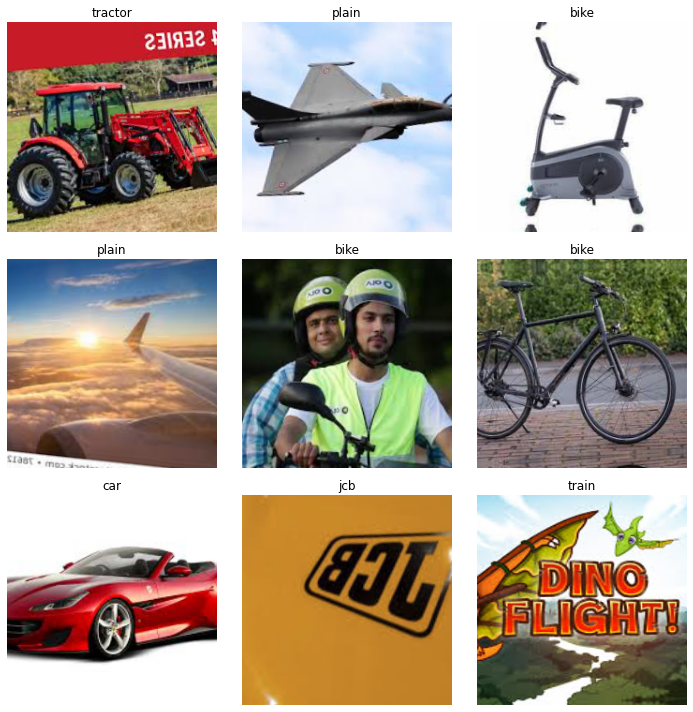

In [ ]:
data.show_batch(rows=3,figsize=(10,10))

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,1.072967,0.573394,0.822244,00:48
1,0.815337,0.525428,0.845084,00:48
2,0.640043,0.441032,0.847071,00:47
3,0.509578,0.442306,0.863952,00:46
4,0.419215,0.393923,0.879841,00:46
5,0.338176,0.359099,0.878848,00:45
6,0.286485,0.358959,0.879841,00:44
7,0.259119,0.356292,0.881827,00:44


In [ ]:
os.makedirs("/content/to_zip",exist_ok=True)

In [ ]:
learn.save("/content/to_zip/Stage-1")

In [ ]:
learn.load("/content/to_zip/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (4032 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
jcb,jcb,jcb,jcb,jcb
Path: /content/my_data;

Valid: LabelList (1007 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bicycle,plain,plain,plain,plain
Path: /content/my_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tr

In [ ]:
learn.export("/content/to_zip/export.pkl")
!pip install -U kora

Requirement already up-to-date: kora in /usr/local/lib/python3.6/dist-packages (0.5.7)


In [ ]:
#import shutil
#shutil.make_archive("vehicle_dat", 'zip', my_dir)

In [ ]:
# !unzip vehicle_dat.zip

In [ ]:
from kora.drive import upload_public
url = upload_public('/content/to_zip/export.pkl')
url

'https://drive.google.com/uc?id=1rm8xcwzko5o--dbDE7e7evmktgAiFUWQ'